In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'}
plt.rcParams.update(params)

In [3]:
image_dir = '/global/project/projectdirs/cosmo/staging'
surveyccd_path = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/survey-ccds-decam-dr9.fits.gz'
ccd_columns = ['image_filename', 'image_hdu', 'expnum', 'ccdname', 'filter', 'ccd_cuts', 'ccdskycounts', 'plver', 'ra_bore', 'dec_bore']
ccd = Table(fitsio.read(surveyccd_path, columns=ccd_columns))
skyrun = Table.read('/global/cscratch1/sd/rongpu/temp/skyrunsgoodcountexpnumv48dr8.fits')

In [4]:
index = 3
run_list = [463, 462, 456, 428]
mask = skyrun['run']==run_list[index]
expnum = skyrun['expnum'][mask][0]
print(expnum)

229286


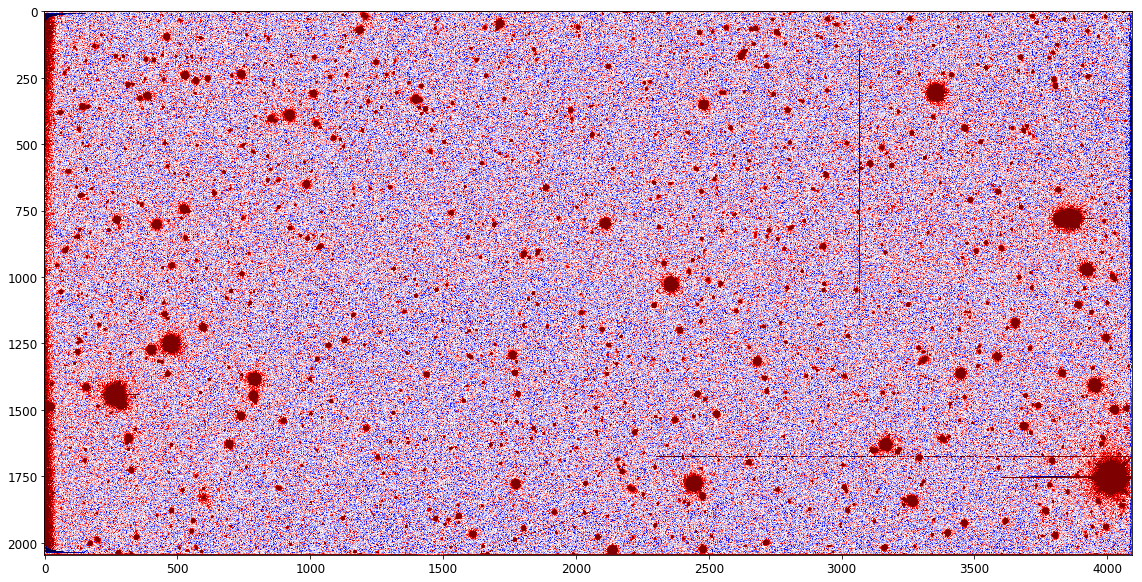

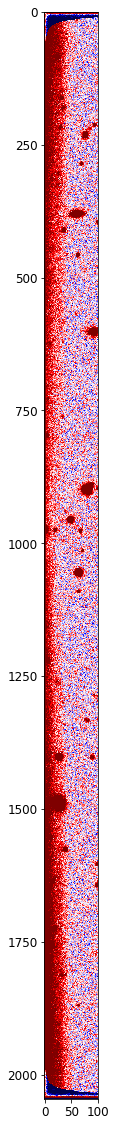

In [5]:
mask = ccd['expnum']==expnum
mask &= ccd['ccdname']=='N26'
image_hdu = ccd['image_hdu'][mask][0]
img_path = os.path.join(image_dir, ccd['image_filename'][mask][0])

img = fitsio.read(img_path, ext=image_hdu)
# naive sky estimation
mask = (img<np.percentile(img.flatten(), 95))
median_sky = np.median(img[mask].flatten())
img = img - median_sky

plt.figure(figsize=(20, 10))
plt.imshow(img.T, cmap='seismic', vmin=-40, vmax=40)
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(img[:100].T, cmap='seismic', vmin=-40, vmax=40)
plt.show()

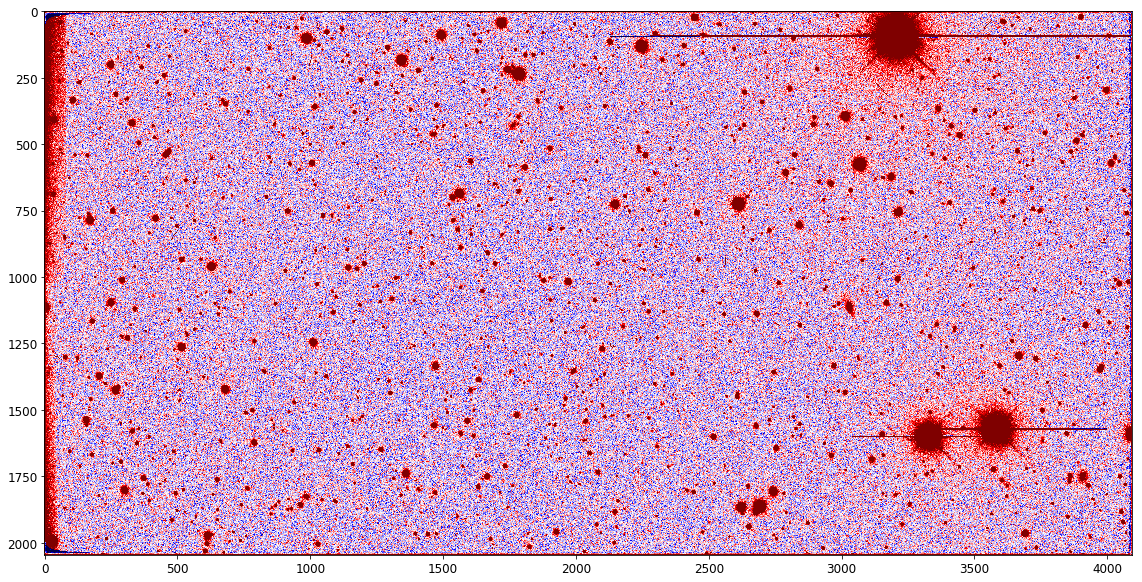

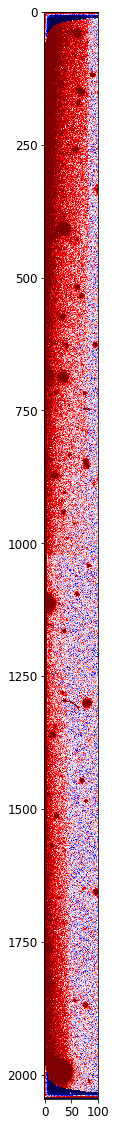

In [6]:
mask = ccd['expnum']==expnum
mask &= ccd['ccdname']=='N23'
image_hdu = ccd['image_hdu'][mask][0]
img_path = os.path.join(image_dir, ccd['image_filename'][mask][0])

img = fitsio.read(img_path, ext=image_hdu)
# naive sky estimation
mask = (img<np.percentile(img.flatten(), 95))
median_sky = np.median(img[mask].flatten())
img = img - median_sky

plt.figure(figsize=(20, 10))
plt.imshow(img.T, cmap='seismic', vmin=-40, vmax=40)
plt.show()

plt.figure(figsize=(20, 20))
# plt.imshow(img[-100:].T, cmap='seismic', vmin=-40, vmax=40)
plt.imshow(img[:100].T, cmap='seismic', vmin=-40, vmax=40)
plt.show()

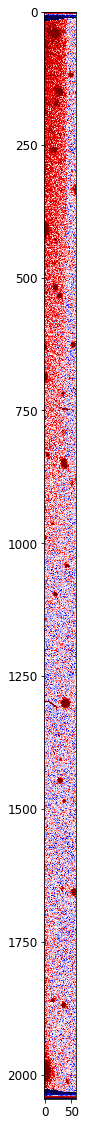

In [7]:
plt.figure(figsize=(20, 20))
# plt.imshow(img[-100:].T, cmap='seismic', vmin=-40, vmax=40)
plt.imshow(img[40:100].T, cmap='seismic', vmin=-40, vmax=40)
plt.show()

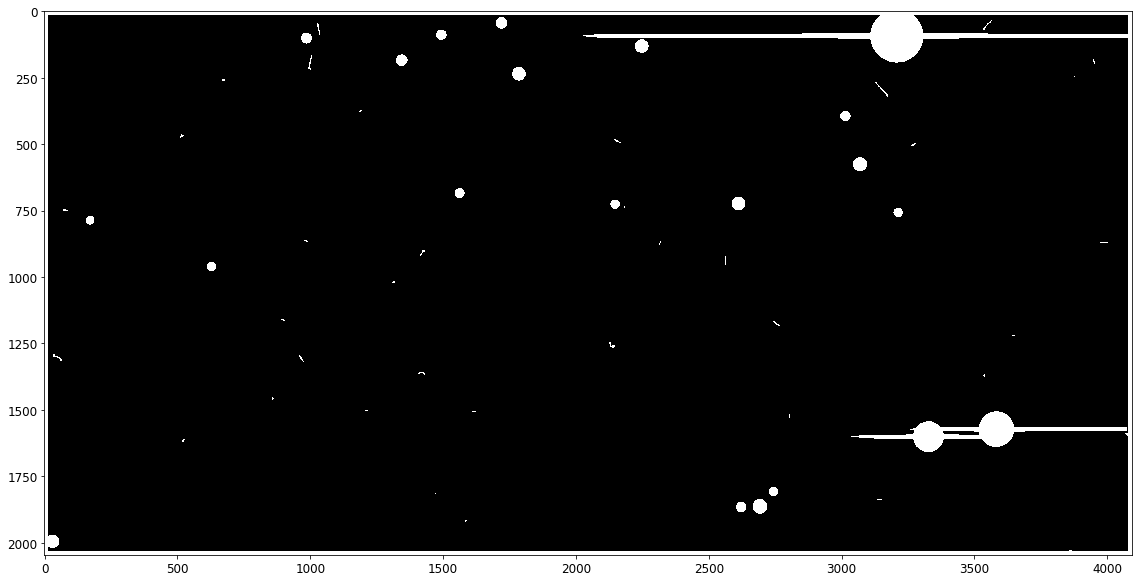

In [8]:
ood_path = img_path.replace('_ooi_', '_ood_')
ood = fitsio.read(ood_path, ext=image_hdu)

plt.figure(figsize=(20, 10))
plt.imshow(ood.T, cmap='gray', vmin=0, vmax=1)
plt.show()

In [9]:
mask = ood==1
img[mask] = np.nan

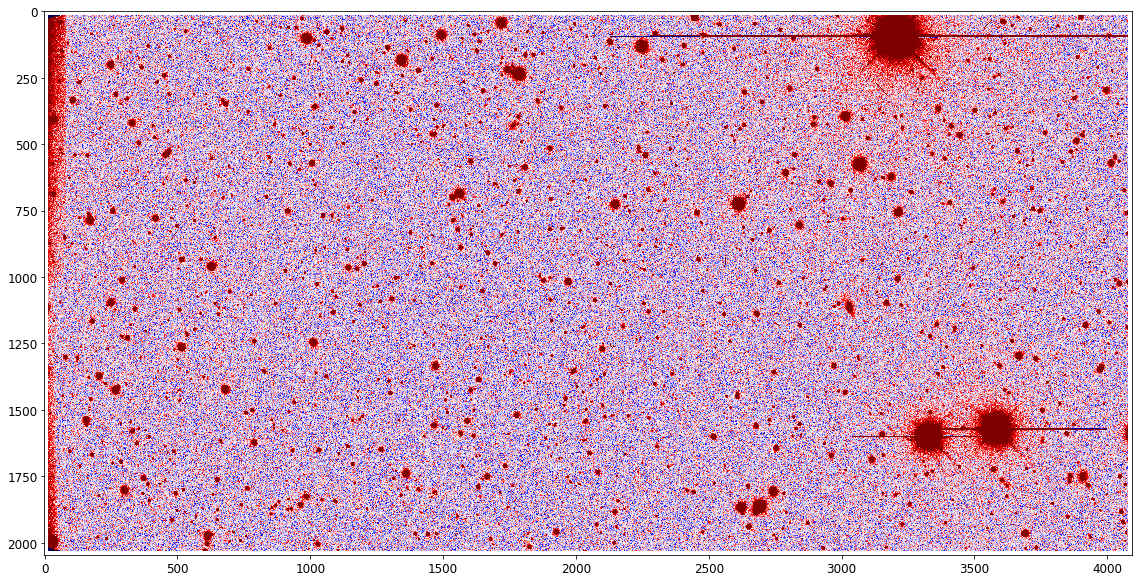

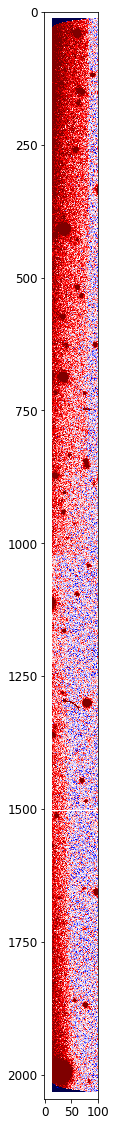

In [10]:
plt.figure(figsize=(20, 10))
plt.imshow(img.T, cmap='seismic', vmin=-40, vmax=40)
plt.show()

plt.figure(figsize=(20, 20))
plt.imshow(img[:100].T, cmap='seismic', vmin=-40, vmax=40)
plt.show()

272760


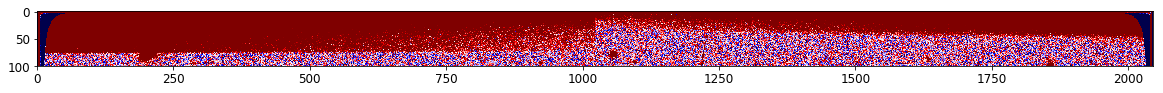

276974


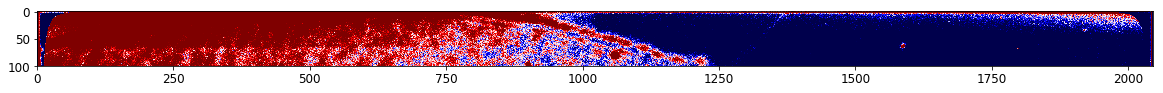

277286


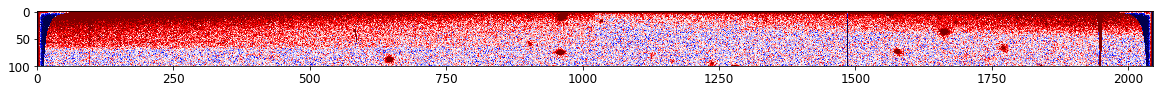

277830


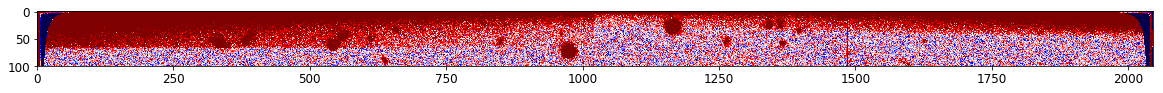

278806


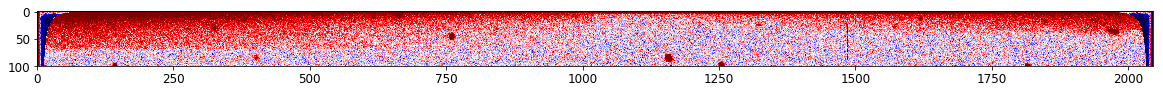

279788


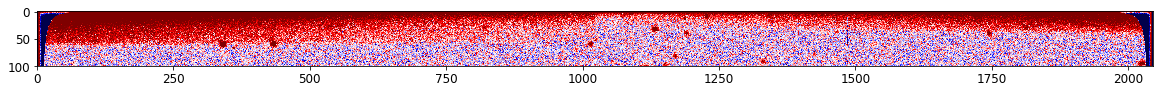

280673


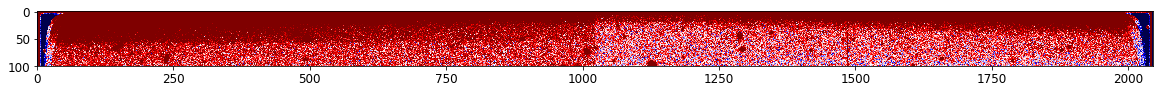

281098


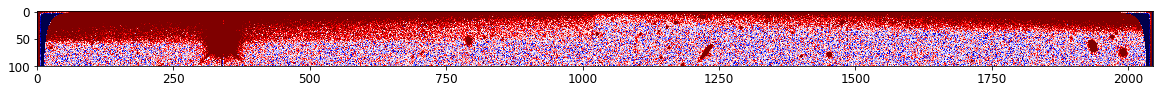

281588


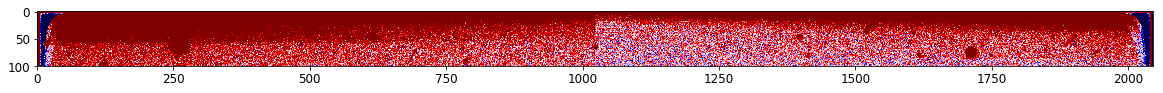

282523


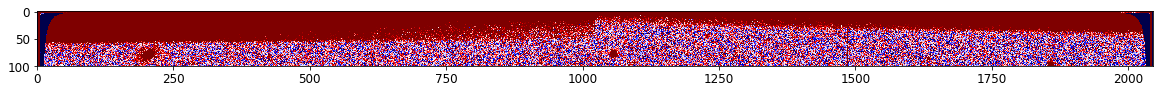

In [11]:
for run in range(463, 473):
    mask = skyrun['run']==run
    expnum = skyrun['expnum'][mask][0]
    print(expnum)
    
    mask = ccd['expnum']==expnum
    mask &= ccd['ccdname']=='N23'
    image_hdu = ccd['image_hdu'][mask][0]
    img_path = os.path.join(image_dir, ccd['image_filename'][mask][0])

    img = fitsio.read(img_path, ext=image_hdu)
    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky

    # plt.figure(figsize=(20, 10))
    # plt.imshow(img.T, cmap='seismic', vmin=-40, vmax=40)
    # plt.show()

    plt.figure(figsize=(20, 20))
    # plt.imshow(img[-100:].T, cmap='seismic', vmin=-40, vmax=40)
    plt.imshow(img[:100], cmap='seismic', vmin=-40, vmax=40)
    plt.show()

347634


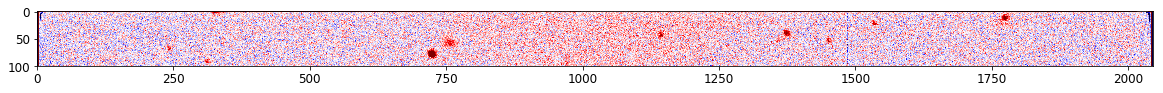

348306


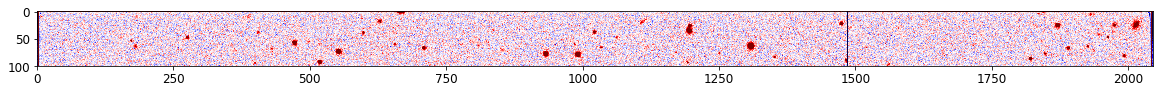

349218


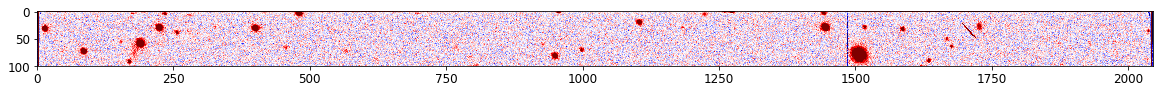

349667


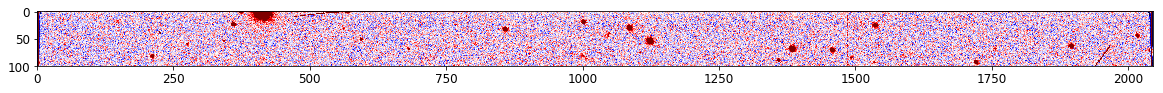

350137


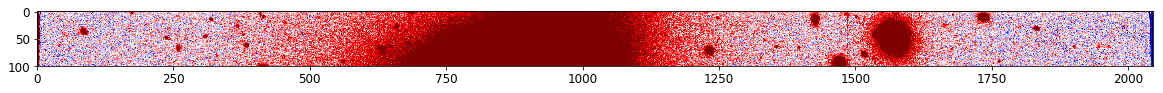

350531


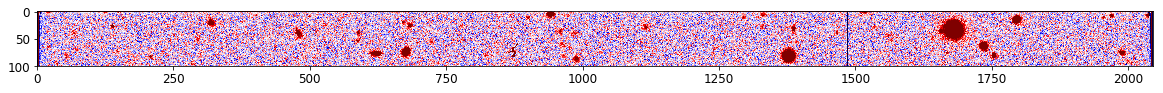

351658


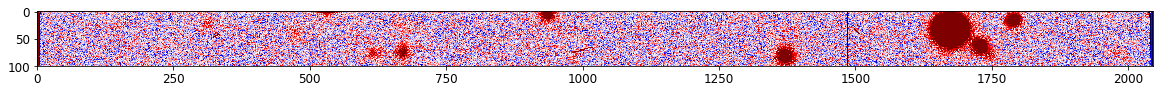

In [12]:
for run in range(473, 480):
    mask = skyrun['run']==run
    expnum = skyrun['expnum'][mask][0]
    print(expnum)
    
    mask = ccd['expnum']==expnum
    mask &= ccd['ccdname']=='N23'
    image_hdu = ccd['image_hdu'][mask][0]
    img_path = os.path.join(image_dir, ccd['image_filename'][mask][0])

    img = fitsio.read(img_path, ext=image_hdu)
    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky

    # plt.figure(figsize=(20, 10))
    # plt.imshow(img.T, cmap='seismic', vmin=-40, vmax=40)
    # plt.show()

    plt.figure(figsize=(20, 20))
    # plt.imshow(img[-100:].T, cmap='seismic', vmin=-40, vmax=40)
    plt.imshow(img[:100], cmap='seismic', vmin=-40, vmax=40)
    plt.show()

__For runs on/after 473, it is no longer affected by the edge glow problem__

In [27]:
mask = skyrun['filter']=='r'
mask &= (skyrun['expnum']>=296689) & (skyrun['expnum']<=298266)
expnum_list = skyrun['expnum'][mask]
len(expnum_list)

10

296689


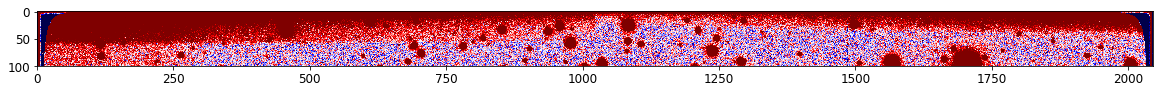

296690


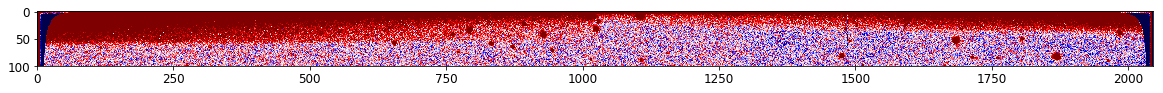

296691


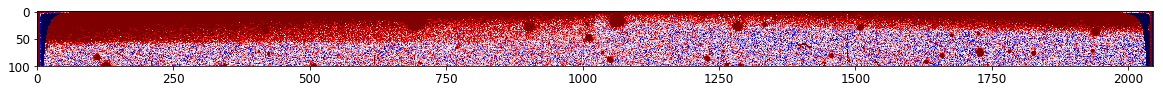

296698


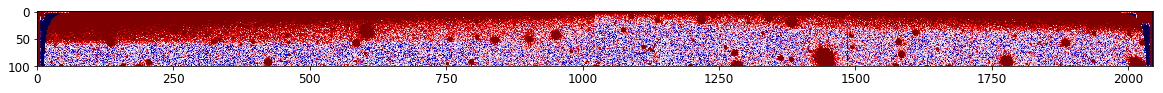

296699


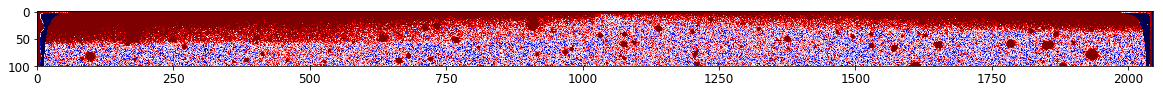

298251


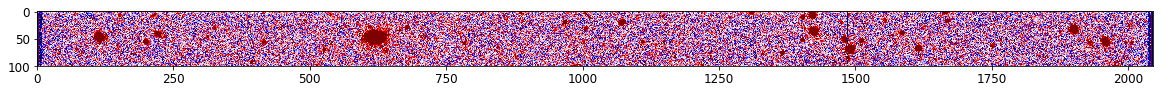

298263


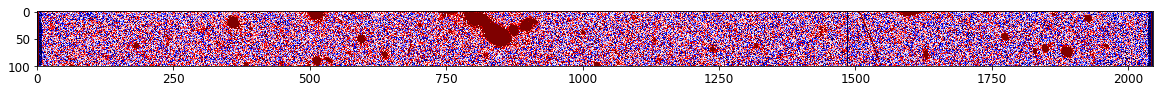

298264


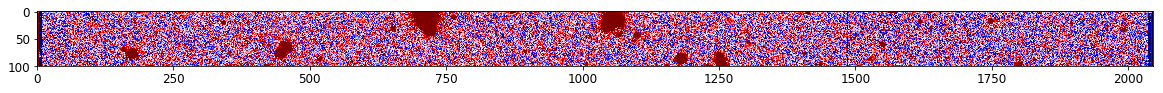

298265


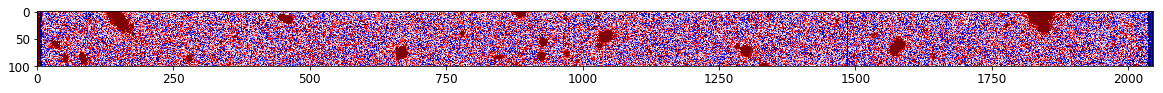

298266


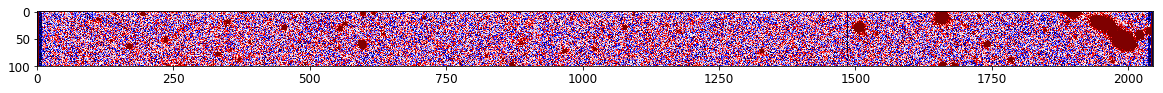

In [28]:
mask = skyrun['filter']=='r'
mask &= (skyrun['expnum']>=296689) & (skyrun['expnum']<=298266)
expnum_list = skyrun['expnum'][mask]
len(expnum_list)
for expnum in expnum_list:
    print(expnum)
    
    mask = ccd['expnum']==expnum
    mask &= ccd['ccdname']=='N23'
    image_hdu = ccd['image_hdu'][mask][0]
    img_path = os.path.join(image_dir, ccd['image_filename'][mask][0])

    img = fitsio.read(img_path, ext=image_hdu)
    # naive sky estimation
    mask = (img<np.percentile(img.flatten(), 95))
    median_sky = np.median(img[mask].flatten())
    img = img - median_sky

    # plt.figure(figsize=(20, 10))
    # plt.imshow(img.T, cmap='seismic', vmin=-40, vmax=40)
    # plt.show()

    plt.figure(figsize=(20, 20))
    # plt.imshow(img[-100:].T, cmap='seismic', vmin=-40, vmax=40)
    plt.imshow(img[:100], cmap='seismic', vmin=-40, vmax=40)
    plt.show()

__For exposures on/after 298251, it is no longer affected by the edge glow problem__

In [30]:
skyrun = Table.read('/global/cscratch1/sd/rongpu/temp/skyrunsgoodcountexpnumv48dr8.fits')
print(np.sum((skyrun['expnum']<298251) & (skyrun['filter']=='r')))
print(np.sum((skyrun['expnum']>=298251) & (skyrun['filter']=='r')))

3110
27337
